# 1. Import all libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet  # Fixed this line
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')


# 2. Read and Understand Dataset

In [96]:
# Read the dataset
df = pd.read_csv('day.csv')

In [97]:
# Head to check first 5 records
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [98]:
#print all exisitng columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [99]:
# Describing dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [100]:
#Shape of dataframe
df.shape

(730, 16)

In [101]:
# Check for Data Type, Null % and Unique Value value
temp=pd.DataFrame(index=df.columns)
temp['DataType'] = df.dtypes
temp['Null (%)']=df.isnull().sum()/len(df)*100
temp['Unique_Counts'] = df.nunique()
print(len(temp))
temp

16


,DataType,Null (%),Unique_Counts
instant,int64,0.0,730
dteday,object,0.0,730
season,int64,0.0,4
yr,int64,0.0,2
mnth,int64,0.0,12
holiday,int64,0.0,2
weekday,int64,0.0,7
workingday,int64,0.0,2
weathersit,int64,0.0,3
temp,float64,0.0,498


In [102]:
# Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Get day from dteday and drop dteday columns

In [103]:
# Get day from dteday and drop dteday
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df['day'] = df['dteday'].dt.dayofyear
df.drop('dteday',axis=1,inplace=True)

# 3. Clean the Dataset

In [104]:
# Drop the duplicates and check the shape again
df.drop_duplicates(inplace=True)
df.shape

(730, 16)

No duplicates found

In [105]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [106]:
# Dropping the columns instant as it is id here

df.drop('instant',axis=1,inplace=True)

In [107]:
# Remove Outilers
filtered_df = df.copy()  # Create a copy of the original DataFrame to filter
for column in df.columns:
    # Step 2: Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Step 3: Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Step 4: Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 5: Filter the outliers for the current column
    filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]

# Output the filtered DataFrame
print("Filtered Data (Outliers Removed):")
print(filtered_df.shape)

df = filtered_df.copy()

Filtered Data (Outliers Removed):
(654, 15)


Correlation Matrix:


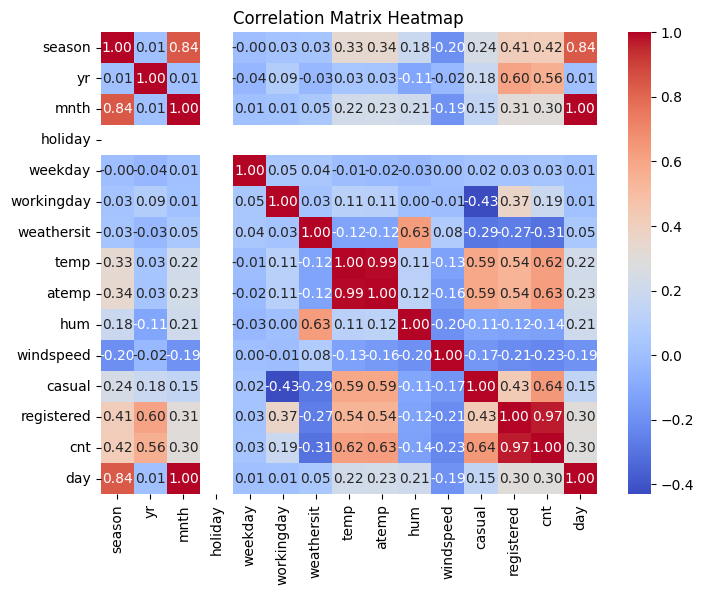

In [108]:
# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 2: Print the correlation matrix
print("Correlation Matrix:")

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

**Drop Highly Correlated Columns:**

1. Since temp and atemp are highly correlated (0.991), keep only one of them in  model to reduce redundancy.
2. registered and cnt are also highly correlated (0.973), and since cnt is likely the sum of registered and casual, consider dropping registered and casual and using just cnt.
3. Since mnthseason are highly correlated (0.84), keep only one of them in model to reduce redundancy.
4. Since day are month correlated (1), keep only one of them in model to reduce redundancy.

**Feature Engineering:**

1. The negative correlation between workingday and casual users (-0.361) suggests that casual users are more likely to ride bikes on weekends and holidays, while working users are likely using bikes for commuting. This insight can help in predicting casual vs. registered user behavior depending on the day of the week.
2. The mild negative correlation between weathersit and the count of users (cnt) implies that weather conditions (like rain or snow) might reduce bike usage. You might want to build a feature interaction between weather conditions and user count to reflect this impact more explicitly.

In [109]:
df.drop(['atemp','registered','casual','season','day'],inplace=True,axis=1)

In [110]:
#check exisitig columns
df.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'cnt'],
      dtype='object')

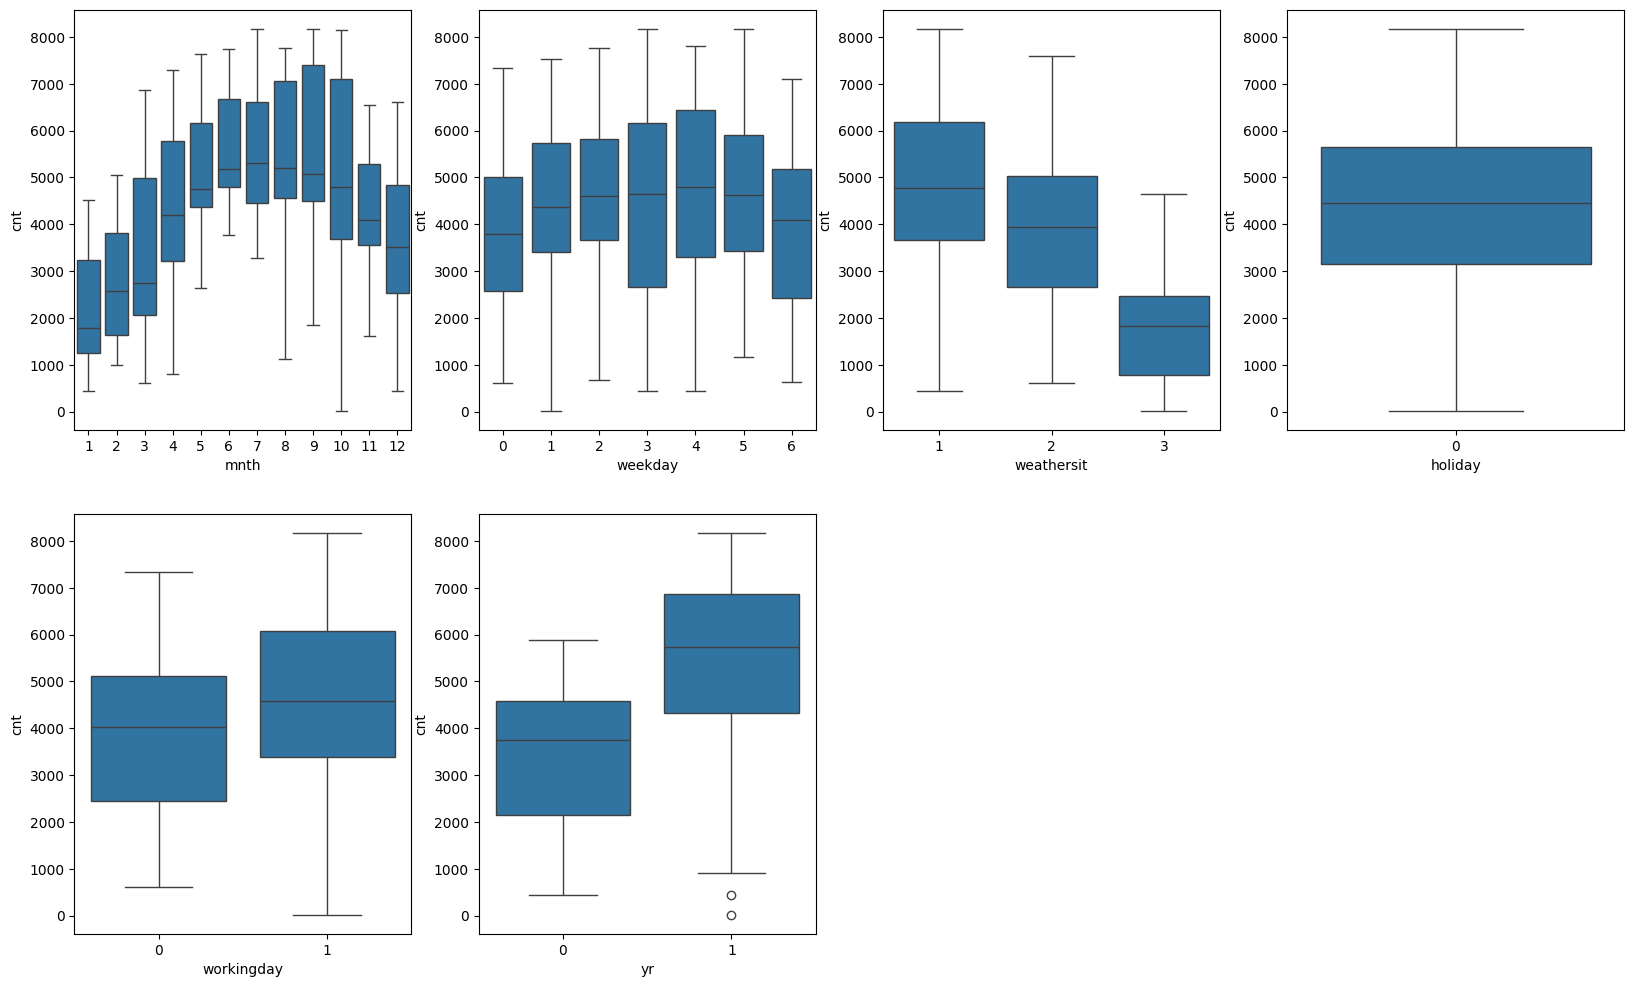

In [111]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

A column with a single unique value doesn't change across rows, meaning it does not capture any useful variation in the data. It will have zero predictive power.
So, here also drop holiday columns

In [112]:
df.drop('holiday',axis=1,inplace=True)

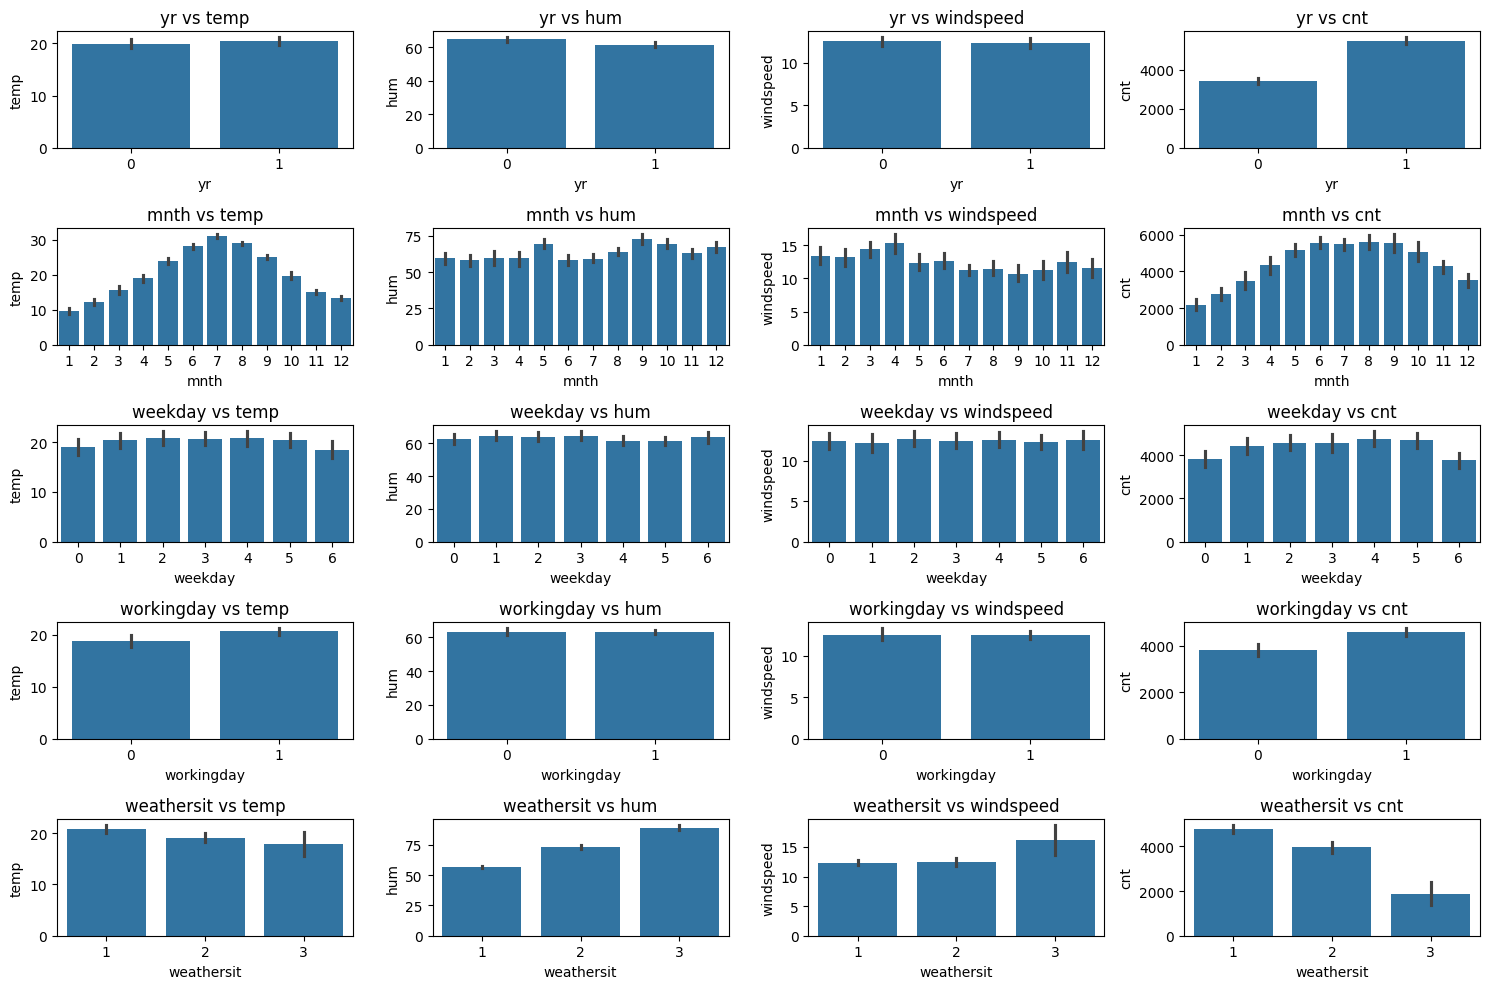

In [113]:
# List of categorical columns and continuous columns
categorical_columns = ['yr', 'mnth',  'weekday', 'workingday','weathersit',]
continuous_columns = [ 'temp', 'hum', 'windspeed', 'cnt']

# Set up the figure and axes for the subplots
plt.figure(figsize=(15, 10))

# Plot barplots for each combination of categorical and continuous variables
for i, cat_col in enumerate(categorical_columns):
    for j, cont_col in enumerate(continuous_columns):
        plt.subplot(len(categorical_columns), len(continuous_columns), i * len(continuous_columns) + j + 1)
        sns.barplot(x=cat_col, y=cont_col, data=df)
        plt.title(f'{cat_col} vs {cont_col}')
        plt.tight_layout()

# Show the plot
plt.show()

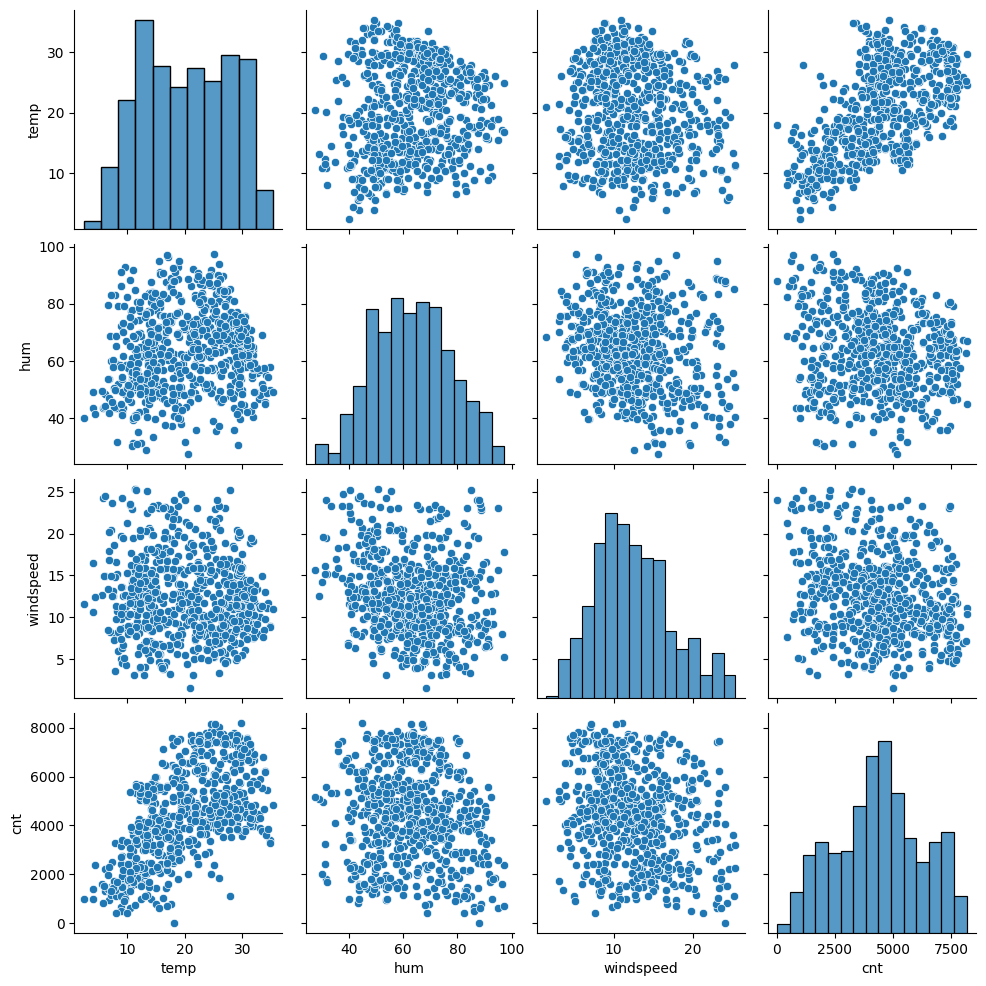

In [114]:
# Analysing/visualizing the numerical columns
sns.pairplot(data=df,vars=['temp','hum','windspeed','cnt'])
plt.show()

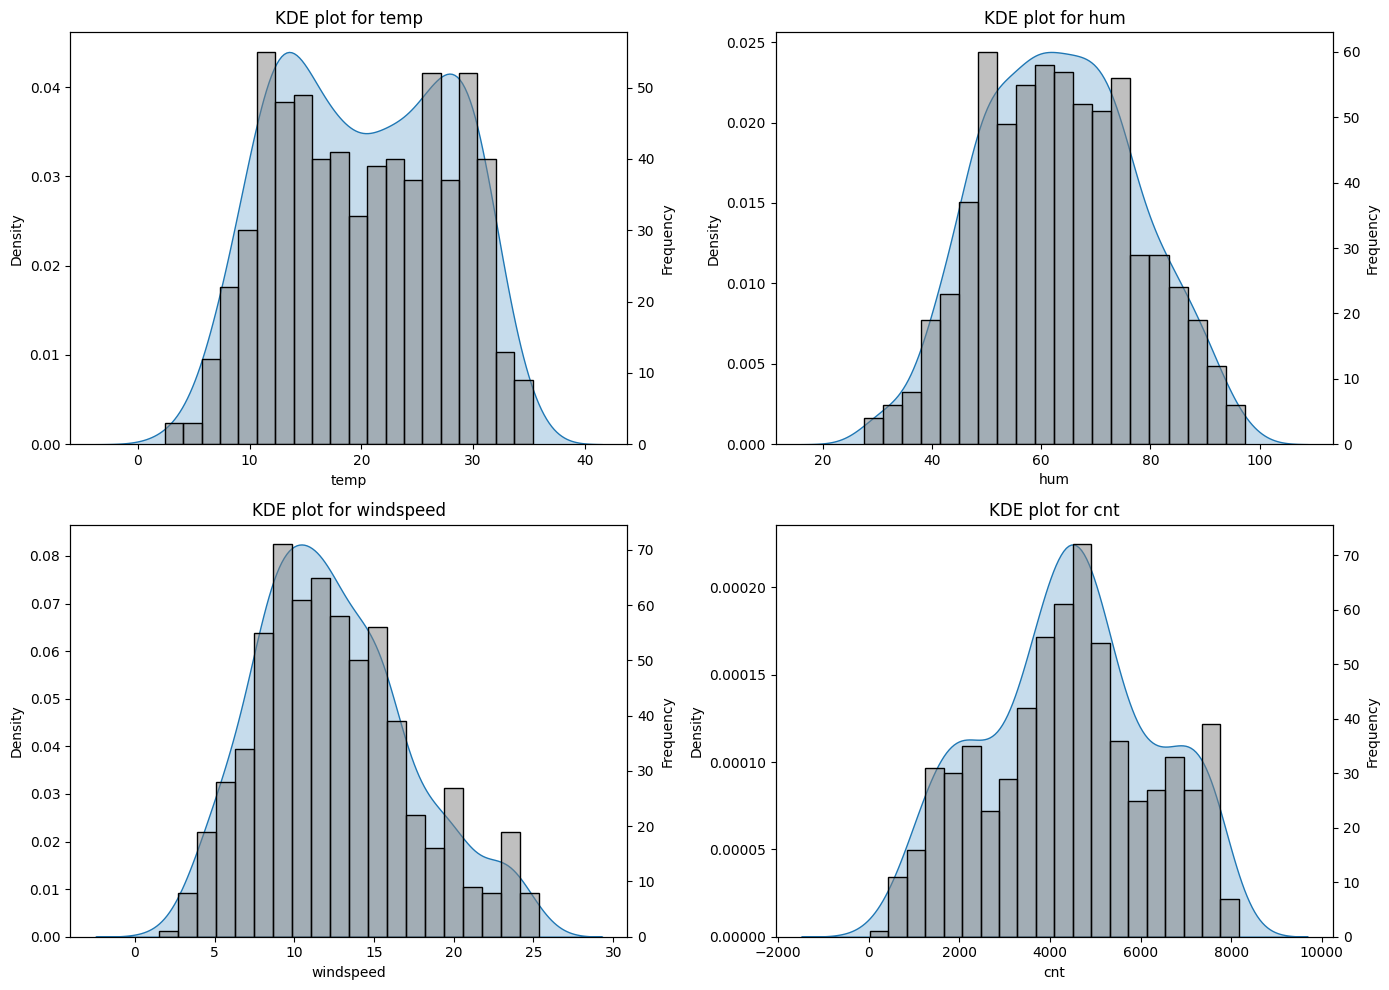

In [115]:
# Cols to check skewness
columns = ['temp', 'hum', 'windspeed', 'cnt']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(columns):
    ax_kde = axes[i // 2, i % 2]  # Position for KDE plot
    sns.kdeplot(df[col], fill=True, ax=ax_kde)
    ax_kde.set_title(f'KDE plot for {col}')
    ax_kde.set_xlabel(col)
    ax_kde.set_ylabel('Density')

    # Add bar plot (histogram)
    ax_hist = ax_kde.twinx()  # Sharing the same x-axis
    sns.histplot(df[col], kde=False, bins=20, color='gray', ax=ax_hist, alpha=0.5)
    ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 4. Splitting the Data and Scaling

In [116]:
# Rescaling the features

# Define the columns to scale
cols = ['temp','hum','windspeed','cnt']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data on the selected columns
df[cols] = scaler.fit_transform(df[cols])

In [117]:
# splitting the dataframe into Train and Test
X = df.drop('cnt', axis=1)  # Features (all columns except target)
Y = df['cnt']  # Target variable (the column you want to predict)

In [118]:
#VIF Calculation
# Add constant for VIF calculation (for intercept term)
X_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Display VIF values
print("VIF values for each feature:")
print(vif_data)

VIF values for each feature:
      Feature        VIF
0       const  29.951284
1          yr   1.031997
2        mnth   1.111738
3     weekday   1.012456
4  workingday   1.024622
5  weathersit   1.922133
6        temp   1.137110
7         hum   2.040549
8   windspeed   1.144283


#### **None of the features have values greater than 10, so we will keep all the columns.**

In [119]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [120]:
# check the shape of training datatset

print(X_train.shape)
print(Y_train.shape)

(457, 8)
(457,)


In [121]:
# check the shape of test datatset

print(X_test.shape)
print(Y_test.shape)

(197, 8)
(197,)


# 5. Building the Linear Model

In [122]:
# Build the model with the linear regression algorithm:
model = LinearRegression()

In [123]:
# Perform feature selection using RFE to select n features (e.g., 5 features):
model.fit(X_train, Y_train)

LinearRegression()

1. **R-squared (r2_score)**: Represents the proportion of variance in the dependent variable that is predictable from the independent variables. A higher R² value (closer to 1) indicates a better fit of the model to the data.
2. **MAE:** The average of the absolute differences between the predicted and actual values.
3. **MSE:** The average of the squared differences between the predicted and actual values. It gives a higher penalty for large errors.
4. **RMSE:** The square root of MSE, which brings the error metric back to the original units of the target variable.

In [124]:
# Predict using the trained model
Y_pred = model.predict(X_test)

# Calculate R-squared (R²)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


R-squared: 0.7899270526332798
Mean Absolute Error: 0.07739732708250552
Mean Squared Error: 0.01011455372036147
Root Mean Squared Error: 0.10057113761095413


#### The code uses SHAP (SHapley Additive exPlanations) to explain the predictions of a linear regression model. It creates a SHAP explainer, computes SHAP values for the training data, and generates a summary plot. The summary plot displays feature importance, highlighting how each feature impacts the model's predictions.

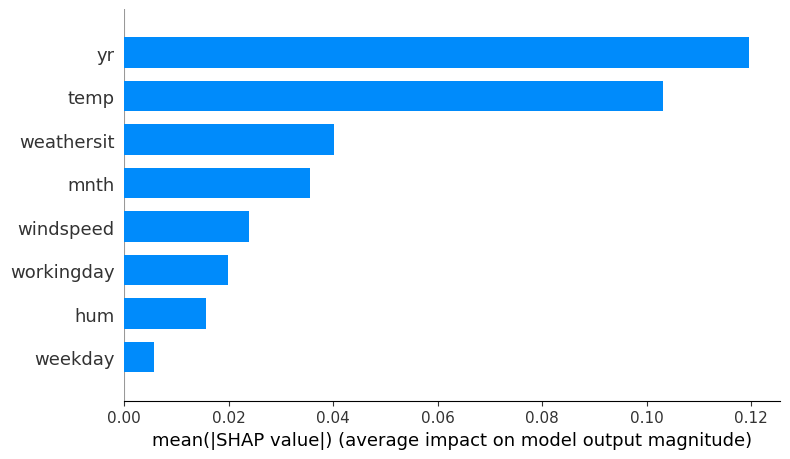

In [125]:
import shap

# Create the SHAP explainer for the linear regression model
explainer = shap.LinearExplainer(model, X_train)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)

# Plot the summary plot of the SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar")


**Implementing the Threshold Selection**

1. Features with SHAP values > 0.05: High impact (keep them).
2. Features with SHAP values between 0.02 and 0.05: Medium impact (optional, depending on your preference).
3. Features with SHAP values < 0.02: Low impact (consider removing).

### **Let's start with High Impact and check the accuracy first.**

In [126]:
df_high = df[['yr','temp','cnt']]

In [127]:
# splitting the dataframe into Train and Test
X = df_high.drop('cnt', axis=1)  # Features (all columns except target)
Y = df_high['cnt']  # Target variable (the column you want to predict)

#### **Polynomial Features:** Adding polynomial terms (like quadratic or cubic features) can help capture non-linear relationships.

In [128]:
# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)

In [129]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [130]:
# Perform feature selection using RFE to select n features (e.g., 5 features):
model.fit(X_train, Y_train)

LinearRegression()

In [131]:
# Predict using the trained model
Y_pred = model.predict(X_test)

# Calculate R-squared (R²)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


R-squared: 0.726420900994265
Mean Absolute Error: 0.08893135386151424
Mean Squared Error: 0.01317223625577581
Root Mean Squared Error: 0.11477036314212746


##### **Here, it is clearly seen that the accuracy has decreased, so let's focus on the high and medium columns.**

In [132]:
# Build the model with the linear regression algorithm:
model = LinearRegression()

In [133]:
df_high_medium = df[['yr','mnth','weathersit','temp','windspeed','workingday','hum','cnt']]

In [134]:
# splitting the dataframe into Train and Test
X = df_high_medium.drop('cnt', axis=1)  # Features (all columns except target)
Y = df_high_medium['cnt']  # Target variable (the column you want to predict)
x_cols = X.columns

In [135]:
# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)

In [136]:
# Convert the transformed polynomial features to a DataFrame for easier manipulation
poly_feature_names = poly.get_feature_names_out(x_cols)
X = pd.DataFrame(X, columns=poly_feature_names)

In [137]:
# Split the data into training and testing sets
X.reset_index(drop=True,inplace=True)
Y.reset_index(drop=True,inplace=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### **ElasticNet:** Use ElasticNet as the model, which combines both Lasso (L1) and Ridge (L2) regularization.
##### 1. **Lasso** - Lasso can also help with feature selection by shrinking some feature coefficients to zero.
##### 2. **Ridge** - Ridge regression can help reduce overfitting by penalizing large coefficients.

In [138]:
# Create a pipeline with PolynomialFeatures and ElasticNet (no scaling)
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), ElasticNet())

#### **Use Cross-Validation:** Evaluate your model’s performance using k-fold cross-validation to get a better estimate of its accuracy and prevent overfitting.

In [139]:
# Cross-validation (5-fold) to get an estimate of the model's performance
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE scores: {-cv_scores}")

Cross-Validation MSE scores: [0.02669541 0.02448146 0.02167293 0.01818597 0.02716774]


#### **Grid Search or Random Search:** You can try hyperparameter tuning with GridSearchCV or RandomizedSearchCV to find the best parameters for regularization (like the alpha parameter for Ridge/Lasso) and other settings.

In [140]:
# Hyperparameter tuning with GridSearchCV
# We will tune the `alpha` (regularization strength) and `l1_ratio` (balance between Lasso and Ridge)
param_grid = {
    'elasticnet__alpha': [0.01, 0.1, 1, 10],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

In [141]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Best parameters from GridSearchCV
print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

Best parameters from GridSearchCV: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.1}


In [142]:
# Evaluate the model on the test set with the best parameters
best_model = grid_search.best_estimator_

In [144]:
# Predict using the trained model
Y_pred = best_model.predict(X_test)

# Calculate R-squared (R²)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


R-squared: 0.8761267732571957
Mean Absolute Error: 0.056883893927183175
Mean Squared Error: 0.005964225389847126
Root Mean Squared Error: 0.07722839756104698


#### Visualize how the predictions align with the actual values

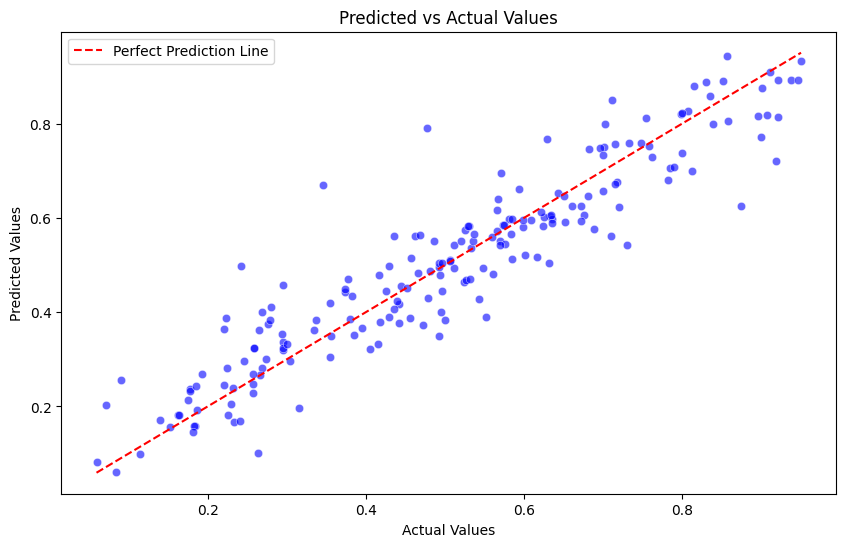

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Predicted vs Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred, color='blue', alpha=0.6)

# Add a 45-degree line (where predicted = actual)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label="Perfect Prediction Line")

# Labels and title
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Show legend
plt.legend()

# Show the plot
plt.show()

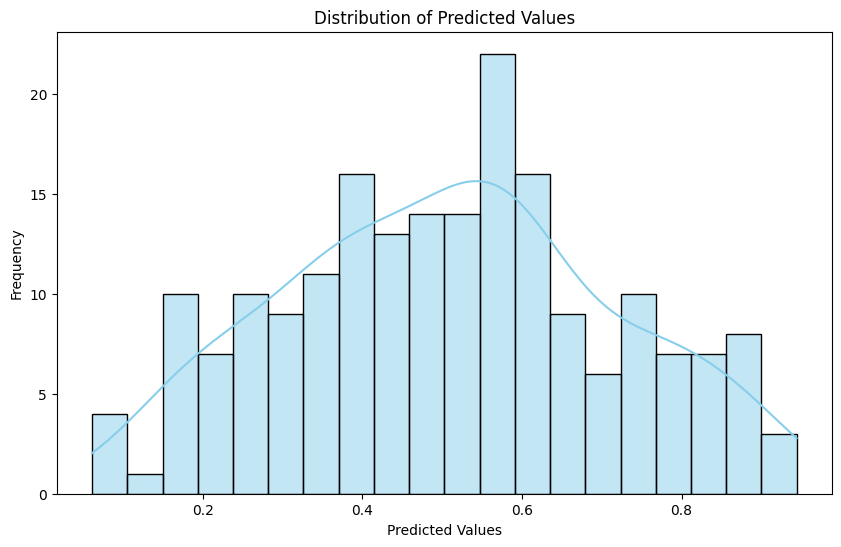

In [60]:
#Create a histogram of the predicted values (counter plot)
plt.figure(figsize=(10, 6))
sns.histplot(Y_pred, kde=True, color="skyblue", bins=20)
plt.title("Distribution of Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.show()

### Normality of error terms

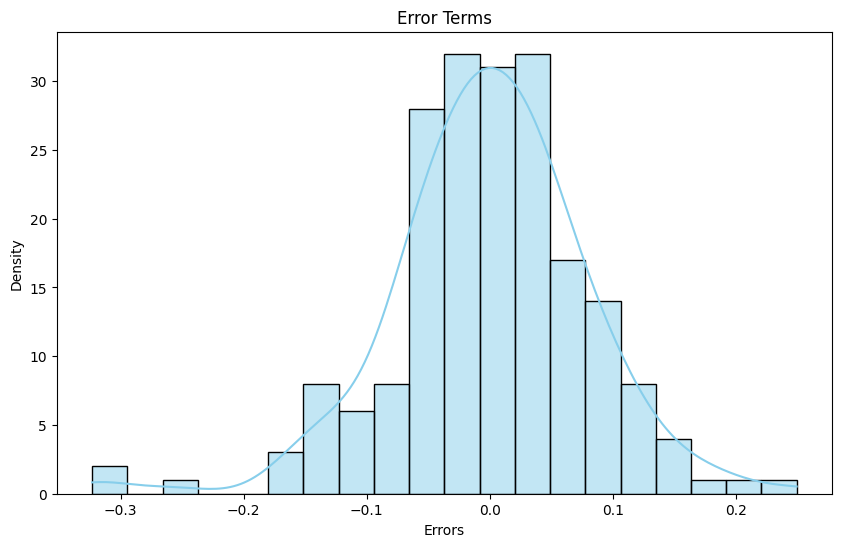

In [62]:
# Plot the histogram of the error terms
plt.figure(figsize=(10, 6))
sns.histplot(Y_test - Y_pred, kde=True, color="skyblue", bins=20)
plt.title("Error Terms")
plt.xlabel("Errors")
plt.ylabel("Density")
plt.show()

Text(0.5, 0, 'Errors')

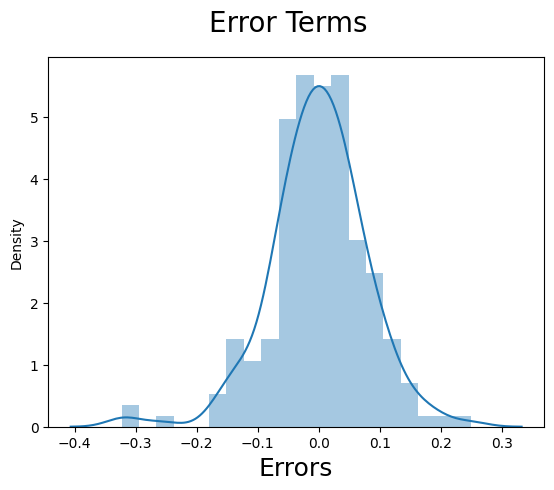

In [63]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((Y_test - Y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### Homoscedasticity

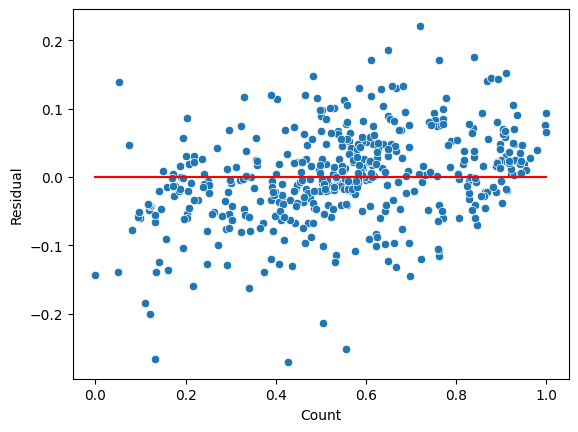

In [66]:
Y_predict = best_model.predict(X_train)
residual = Y_train - Y_predict
sns.scatterplot(x=Y_train,y=residual)
plt.plot(Y_train,(Y_train - Y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [143]:
# Predict on the training data
y_train_pred = best_model.predict(X_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Calculate R-squared for the train set
r2_train = r2_score(Y_train, y_train_pred)

# Calculate R-squared for the test set
r2_test = r2_score(Y_test, y_test_pred)

# Number of data points and predictors
n = len(Y)  # number of samples
p = X.shape[1]  # number of features

# Calculate Adjusted R^2
r2_adj_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1) #train
r2_adj_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1) #train



# Print the R-squared values
print(f"R-squared on the training set: {r2_train:.4f}")
print(f"R-squared on the test set: {r2_test:.4f}")
# Print the Adjusted R-squared values
print(f"Adjusted R-squared on the training set: {r2_adj_train:.4f}")
print(f"Adjusted R-squared on the test set: {r2_adj_test:.4f}")

R-squared on the training set: 0.9141
R-squared on the test set: 0.8761
Adjusted R-squared on the training set: 0.9093
Adjusted R-squared on the test set: 0.8691


#### Comparision between Training and Testing dataset:
* R-squared on the training set: 0.9141
* R-squared on the test set: 0.8761
* Adjusted R-squared on the training set: 0.9093
* Adjusted R-squared on the test set: 0.8691
#### Demand of bikes depend on yr, mnth, weathersit, atemp, windspeed, workingday, hum, cnt.